---

##  This notebook was used to investigate an issue emailed to me indicating that mplfinance raised an exception when the data was np.float32 (instead of np.float64)

## It turns out that version of mplfinance was calling `statistics.stdev()` <br>which raised the exception.  Turns out to be a bug in statistics:<br><br>   https://bugs.python.org/issue39218<br><br>

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

import pandas as pd
pd.__version__  # for the record

'1.0.3'

In [3]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [4]:
#%matplotlib qt
import mplfinance as mpf

In [5]:
tdf = df.iloc[0:20]
import numpy as np

In [6]:
type(tdf.iloc[0,0])

numpy.float64

In [7]:
tdf = tdf.astype(np.float32)

In [8]:
type(tdf.iloc[0,0])

numpy.float32

In [9]:
import statistics

In [10]:
abc = tdf.iloc[0:3,0].values

In [11]:
abc

array([132.09, 133.78, 133.49], dtype=float32)

In [12]:
statistics.mean(abc)

133.12

In [13]:
abc.astype(np.float64)

array([132.08999634, 133.77999878, 133.49000549])

In [14]:
statistics.stdev(abc.astype(np.float64))

0.9037173223977577

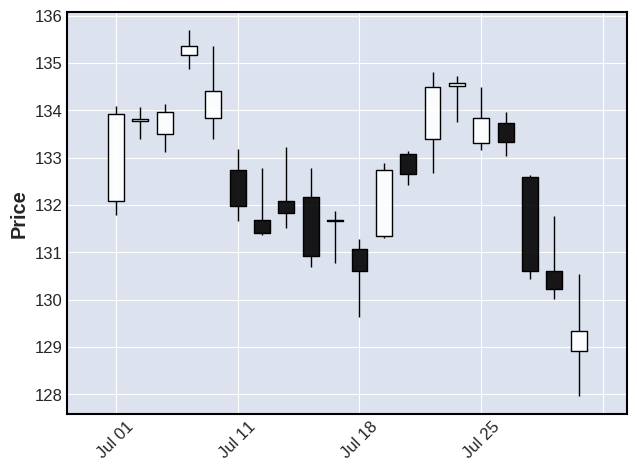

In [15]:
mpf.plot(tdf,type='candle')